# Age and self-conciousness in chimpanzees and bonobos

A logistic regression models the relationship between a binary response variable (evidence of conciousness when presenting a mirror or not evidence in this exercise) and, in this case, one continuous predictor (age). The result is a logit-transformed probability as a linear relation to the predictor. Indeed, the central mathematical concept that underlies logistic regression is the logit—the natural logarithm of an odds ratio. The outcome is a binary response corresponding to having or not having conciousness and it is being predicted by the number of years. The coefficients from the model are given in logged odds (which are difficult to interpret):

$${
\log \left ( \frac{c}{1-c}  \right )=\beta_{0}+\beta_{1}age+\varepsilon 
}$$

where c is the probability of being conciouss, or since

$${
odds\, ratio =  \frac{c}{1-c}
}$$

then

$${
\log \left ( odds\,ratio  \right )=\beta_{0}+\beta_{1}x+\varepsilon 
}$$

To convert logged odds to probabilities (easier to understand, we can translate the above to

$${
k= \frac{exp(\beta _{0}+age\beta _{1})}{(1+exp(\beta _{0}+age\beta _{1}))}
}$$

good explanations here:
<https://www.datacamp.com/community/tutorials/logistic-regression-R>

In [36]:
#enter data
pan.data<-read.csv("pan age conciousness.csv")
str(pan.data)
#take a look at data
head(pan.data)

'data.frame':	76 obs. of  5 variables:
 $ Id           : chr  "" "" "" "" ...
 $ species      : chr  "Pan paniscus" "Pan troglodytes" "Pan paniscus" "Pan paniscus" ...
 $ age          : int  7 8 10 10 12 13 14 15 16 25 ...
 $ sex          : chr  "male" "male" "female" "female" ...
 $ concioussness: int  0 0 0 0 0 0 0 0 0 0 ...


,Id,species,age,sex,concioussness
,<chr>,<chr>,<int>,<chr>,<int>
1,,Pan paniscus,7,male,0
2,,Pan troglodytes,8,male,0
3,,Pan paniscus,10,female,0
4,,Pan paniscus,10,female,0
5,,Pan troglodytes,12,male,0
6,,Pan paniscus,13,male,0


In [2]:
#libraries
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
#separate both species to different dataframe objects
p.troglodytes<-pan.data%>%
filter(species=="Pan troglodytes")
p.paniscus<-pan.data%>%
filter(species=="Pan paniscus")

In [4]:
#chimpanzees' plot
C<-data_space <- ggplot(aes(x=age,y=concioussness),data=p.troglodytes) + 
  geom_point(size=3,aes(color = as.factor(concioussness))) +
  geom_smooth(
    method = "glm",
    method.args = list(family = "binomial"),
    se = T
  )+theme_bw()+ theme(legend.position = "none")   +
ggtitle("chimpanzees") +
labs(x="age(months)",y="probability of selfconciousness")

In [5]:
#bonobos' plot
D<-data_space <- ggplot(aes(x=age,y=concioussness),data=p.paniscus) + 
  geom_point(size=3,aes(color = as.factor(concioussness))) +
  geom_smooth(
    method = "glm",
    method.args = list(family = "binomial"),
    se = T
  )+theme_bw()+ theme(legend.position = "none")   +
ggtitle("bonobos") +
labs(x="age(months)",y="probability of selfconciousness")

In [6]:
#both species together
E<-data_space <- ggplot(aes(x=age,y=concioussness),data=pan.data) + 
  geom_point(size=3,aes(color = as.factor(concioussness))) +
  geom_smooth(
    method = "glm",
    method.args = list(family = "binomial"),
    se = T
  )+theme_bw()+ theme(legend.position = "none")   +
ggtitle("both Pan species together") +
labs(x="age(months)",y="probability of selfconciousness")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



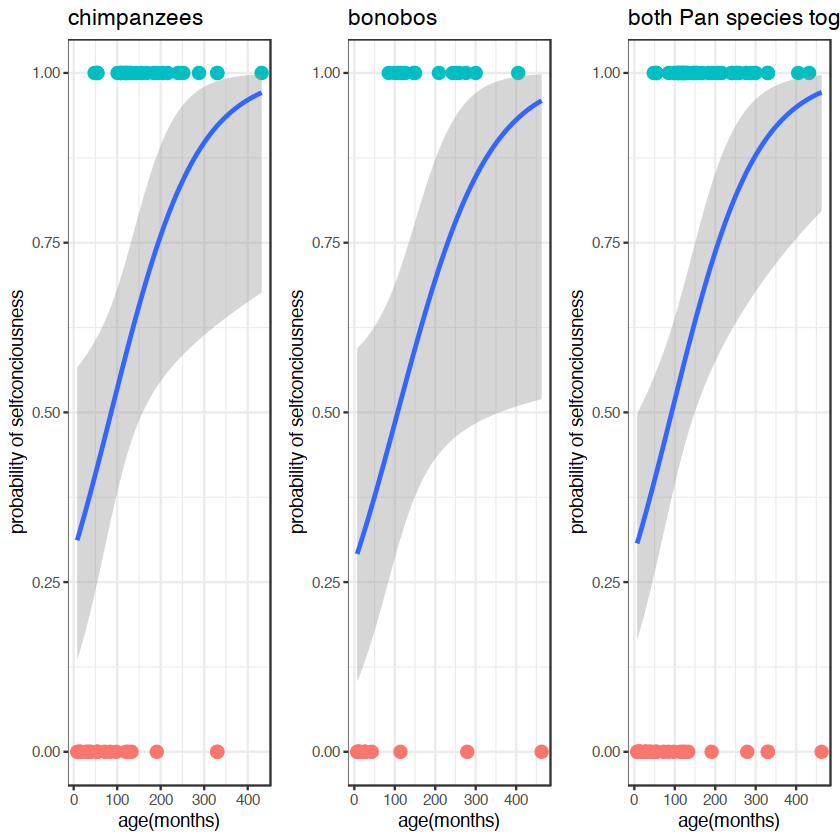

In [7]:
grid.arrange(C,D,E,ncol=3)

In [9]:
# model
model.chimp<-glm(concioussness~age, data = p.troglodytes, family = binomial)
summary(model.chimp)
model.bon<-glm(concioussness~age, data = p.paniscus, family = binomial)
summary(model.bon)
model.both<-glm(concioussness~age, data = pan.data, family = binomial)
summary(model.both)


Call:
glm(formula = concioussness ~ age, family = binomial, data = p.troglodytes)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2606  -0.9822   0.5839   1.0111   1.3455  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.873919   0.568910  -1.536    0.125  
age          0.010146   0.004289   2.365    0.018 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.266  on 48  degrees of freedom
Residual deviance: 58.529  on 47  degrees of freedom
AIC: 62.529

Number of Fisher Scoring iterations: 4



Call:
glm(formula = concioussness ~ age, family = binomial, data = p.paniscus)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5307  -0.8698   0.5757   1.0256   1.2616  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.950524   0.671593  -1.415   0.1570  
age          0.008879   0.004382   2.026   0.0427 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37.096  on 26  degrees of freedom
Residual deviance: 31.496  on 25  degrees of freedom
AIC: 35.496

Number of Fisher Scoring iterations: 4



Call:
glm(formula = concioussness ~ age, family = binomial, data = pan.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6703  -0.9336   0.5509   1.0331   1.3617  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.881449   0.429124  -2.054  0.03997 * 
age          0.009542   0.003079   3.099  0.00194 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.456  on 75  degrees of freedom
Residual deviance:  90.238  on 74  degrees of freedom
AIC: 94.238

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula 'y ~ x'



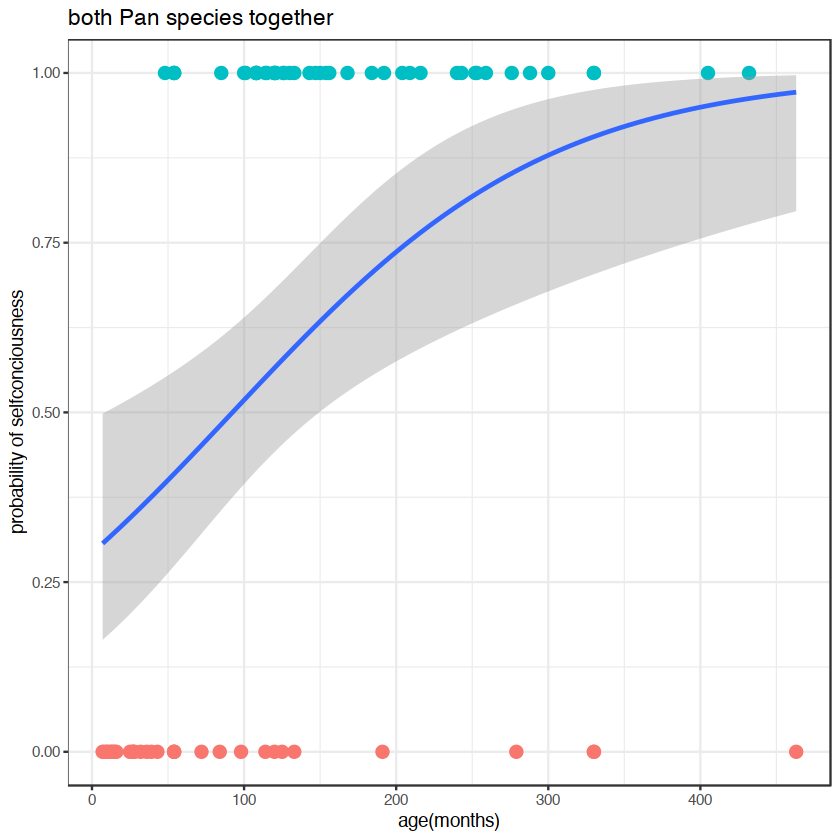

In [8]:
#since the pattern is the same, let's continue with the whole pan dataset
E

**Figure 1**. Relationship of a dichotomous outcome variable (1 = selfconciouss, 0 = not selfconciouss) with age

In [10]:
#just a model
coef(model.both)# identify the model coefficients.
confint(model.both)
#use exp for fitted probabilities
exp(coef(model.both))# find odds ratio, prob
exp(confint(model.both))# calculates confidence interval for odds ratio.

(Intercept)          age 
-0.881449183  0.009542047

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-1.76636751,-0.06850197
age,0.00405094,0.01624529


(Intercept)         age 
  0.4141823   1.0095877

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.1709528,0.9337916
age,1.0040592,1.0163780


The result shows that 
$${
predicted\,logit \,of \,concioussness = -0.81 + 1.009*age
}$$

According to the model, the log of the odds of an individual being self conciouss at the mirror is positiviely related to age (p < .05). In other words, the older, the more likely it is that a chimpanzee will be conciouss of herself.


In [11]:
library(broom)
output.model<-augment(model.both)
output.model$prob<-exp(output.model$.fitted)
head(output.model)

concioussness,age,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd,prob
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,7,-0.8146549,-0.8562479,-0.8721308,0.03609153,1.107122,0.008600103,0.4427921
0,8,-0.8051128,-0.8596724,-0.8754859,0.03579879,1.107085,0.008606905,0.4470375
0,10,-0.7860287,-0.8665484,-0.8822206,0.03521351,1.107012,0.008618844,0.4556507
0,10,-0.7860287,-0.8665484,-0.8822206,0.03521351,1.107012,0.008618844,0.4556507
0,12,-0.7669446,-0.8734598,-0.8889878,0.03462889,1.106938,0.008628596,0.4644299
0,13,-0.7574026,-0.8769288,-0.8923835,0.03433697,1.106901,0.008632667,0.4688827


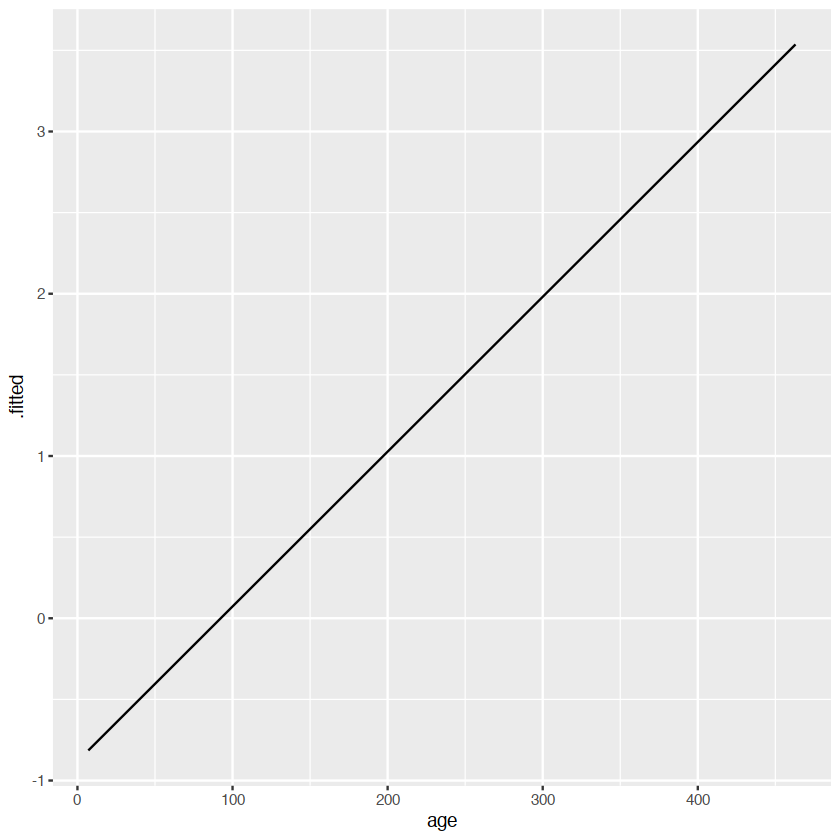

In [12]:
ggplot(data=output.model,aes(age,.fitted))+geom_line()

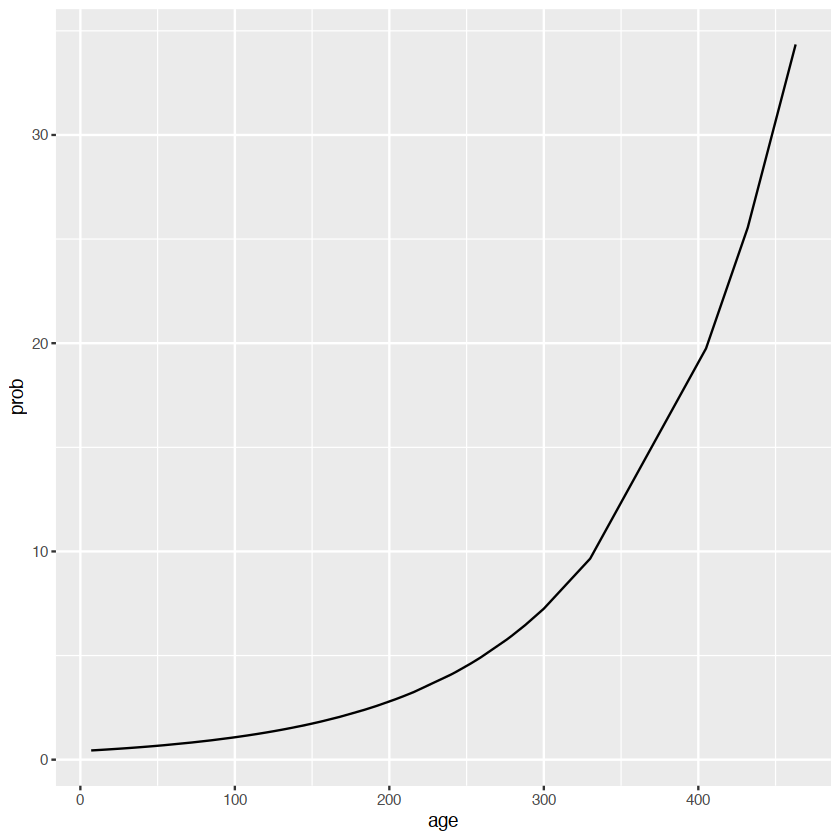

In [13]:
ggplot(data=output.model,aes(age,prob))+geom_line()#in %?

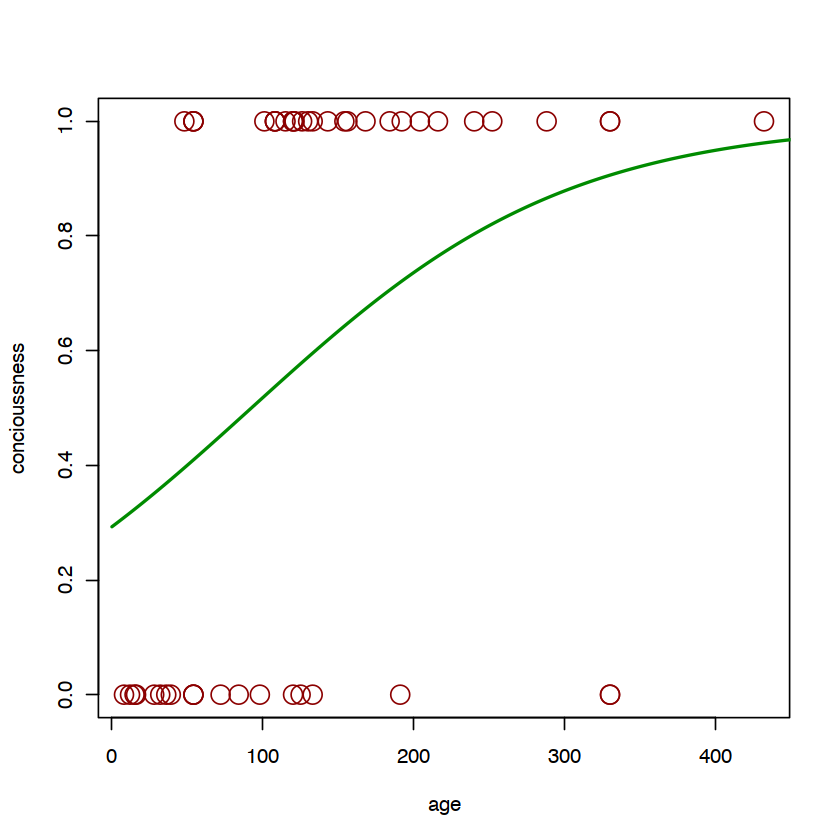

In [23]:
#another way
fit <- model.both
newdat <- data.frame(age=seq(0,600,1))
newdat$concioussness = predict(fit, newdata=newdat, type="response")#response gives predicted probabilities!!!
plot(concioussness~age, data=p.troglodytes, col="red4",cex=2)
lines(concioussness ~ age, newdat, col="red4", lwd=2)
#https://daviddalpiaz.github.io/r4sl/logistic-regression.html

In [58]:
#predicted prob to be conciouss at birth and with 500 months
newdat <- data.frame(age=c(0,500))
predict(fit,newdat,type="response")#response gives the predicted probabilities directly without using exp

1         2 
0.2928776 0.9799559

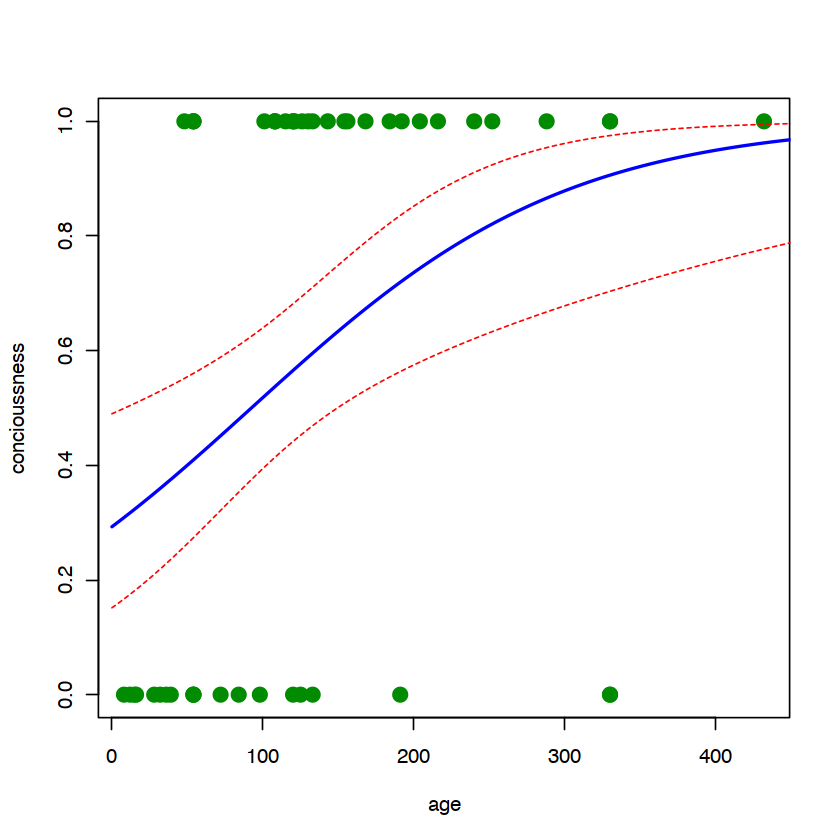

In [35]:
#with CI intervals
preddat <- predict(fit, newdata=newdat, se.fit=TRUE)
plot(concioussness~age, data=p.troglodytes, col="green4",pch=19,cex=1.5)
with(preddat, lines(0:600, exp(fit)/(1+exp(fit)), col="blue",lwd=2))
with(preddat, lines(0:600, exp(fit+1.96*se.fit)/(1+exp(fit+1.96*se.fit)), lty=2,col="red"))
with(preddat, lines(0:600, exp(fit-1.96*se.fit)/(1+exp(fit-1.96*se.fit)), lty=2,col="red"))

Logistic regression plot of odds ratios and 95% confidence intervals; Effects of age on self-conciousness

In [39]:
library(sjPlot)
library(sjlabelled)
library(sjmisc)


Attaching package: ‘sjlabelled’


The following object is masked from ‘package:dplyr’:

    as_label



Attaching package: ‘sjmisc’


The following objects are masked from ‘package:sjlabelled’:

    to_character, to_factor, to_label, to_numeric




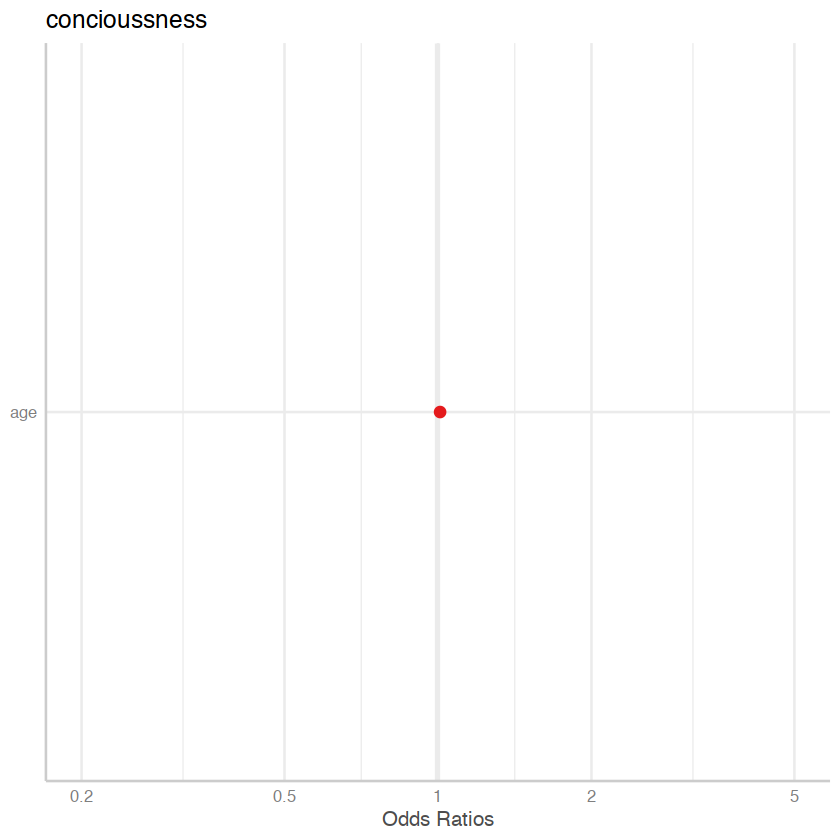

In [57]:
theme_set(theme_sjplot())
plot_model(model.both)#is not it to close to 1?

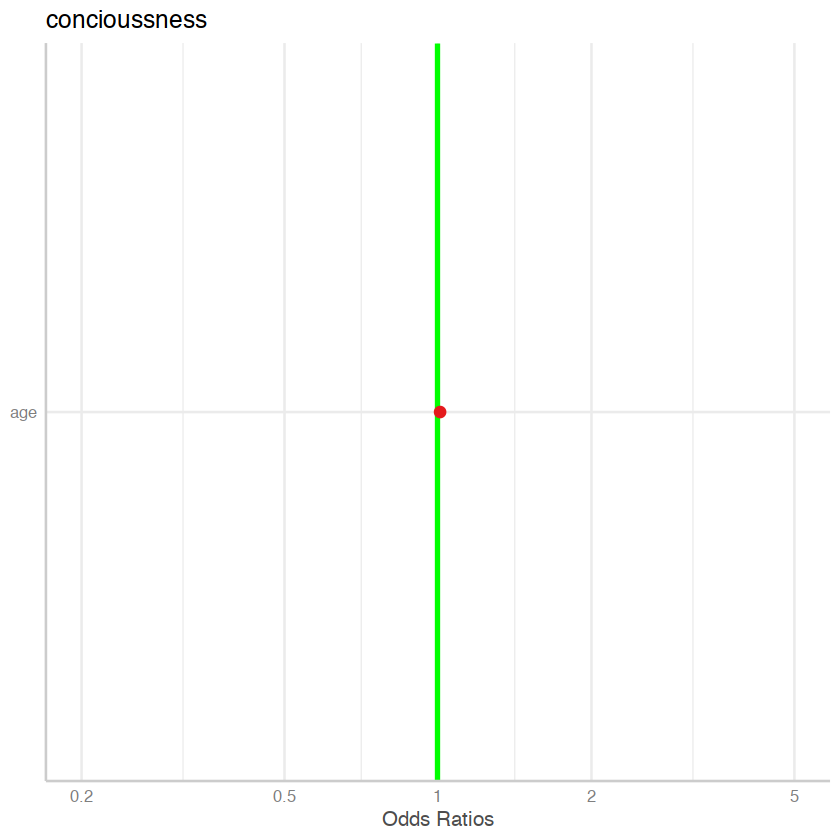

In [47]:
plot_model(fit, vline.color = "green")

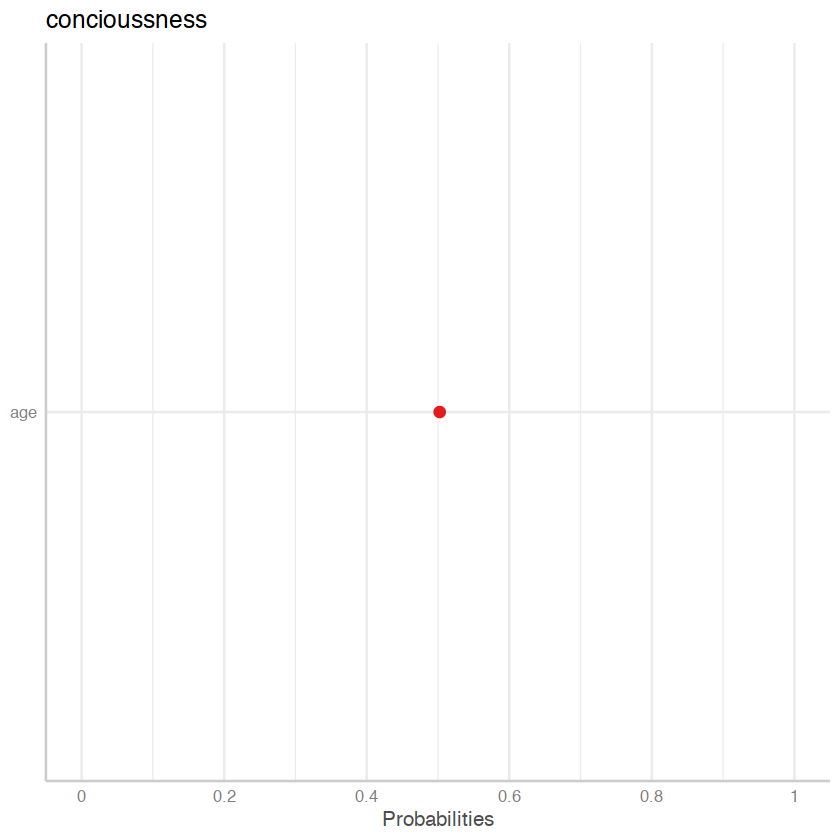

In [44]:
plot_model(model.both, transform = "plogis")

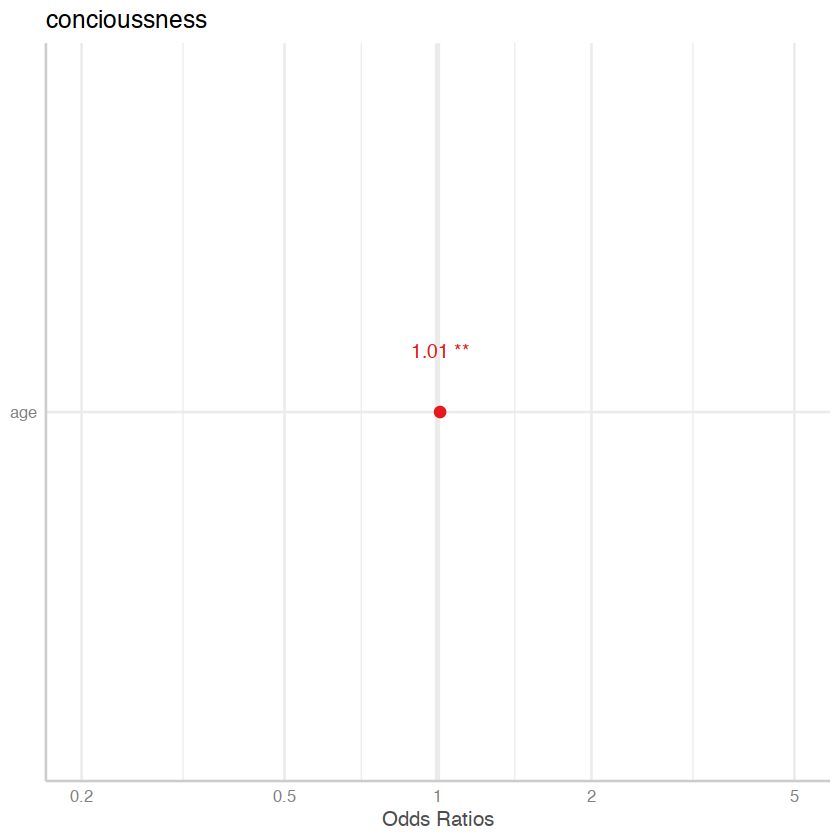

In [46]:
plot_model(model.both, show.values = TRUE, value.offset = .1)

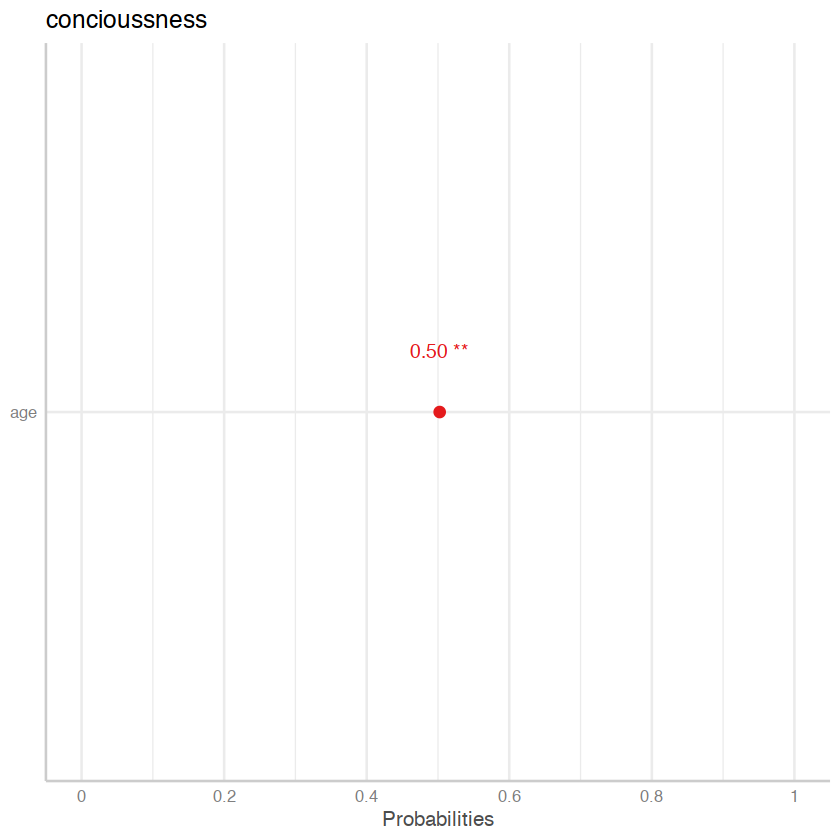

In [48]:
plot_model(model.both, show.values = TRUE, value.offset = .1,
transform = "plogis",vline.color = "green")

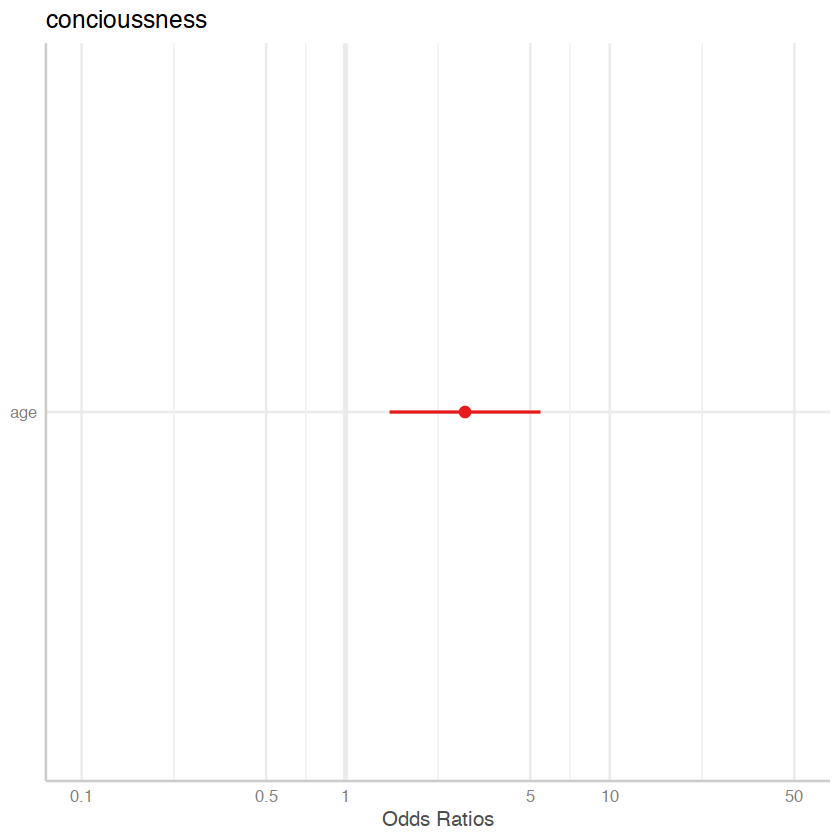

In [49]:
#standarized estimates
plot_model(model.both, type = "std")
